Pythonで確率分布をプロットする（interactive版）
======
***

## 1. 準備
---

In [1]:
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from ipywidgets import interact
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12, 6)

# matplotlibでTexをラベルに使うため
from matplotlib import rc
rc('font', size=14)
rc('text', usetex=True)

## 2. 離散型確率分布
---

### 2.0. 離散型確率分布の確率質量関数PMFと累積分布関数CDFをプロットする関数

In [2]:
def plot_discrete(func, k_max=20):
    """ 与えられた離散型確率分布関数のPMFとCDFをプロットする
        - func: 離散型確率分布関数(scipy.stats.distributions.rv_frozen)
        - k_max: 横軸(確率変数)の最大値(0からk_maxまでプロット)
    """
    # 横軸
    k = np.arange(k_max)
    
    # 確率質量関数PMF
    plt.bar(k, func.pmf(k), color="blue", width=1.0, lw="2", edgecolor="blue",label="Probability mass function", alpha=0.3)
    
    # 累積分布関数CDF
    plt.step(k, func.cdf(k), color="orange", lw="2", label="Cumulative distribution function", alpha=0.8)

    # グラフ設定
    plt.grid()
    plt.legend(loc="upper left", frameon=False)
    plt.xticks(k) # 横軸の目盛り
    plt.ylim((0.0, 1.0))
    plt.xlabel("$k$")
    plt.ylabel("$P(X=k), \:\: P(X \leq k)$")

### 2.1. ポアソン分布（Poisson distribution）

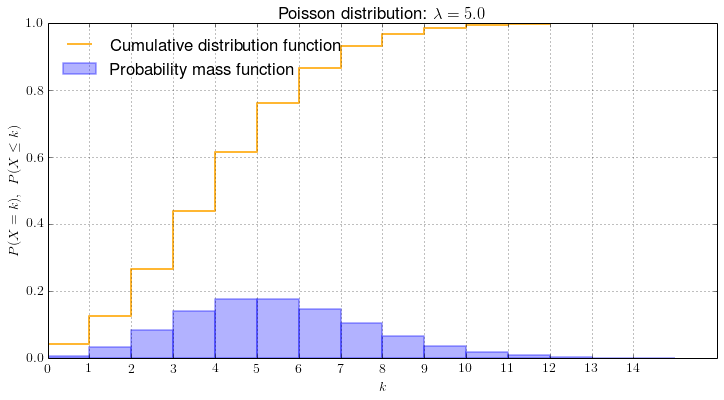

In [3]:
@interact(lambda_=(0.0, 10.0), k_max=(10, 20))
def plot_poisson(lambda_, k_max):
    plot_discrete(stats.poisson(lambda_), k_max)
    plt.title("Poisson distribution: $\lambda = %.1f$" % lambda_)

# 以下のように1行でも記述できるが、読みやすさを優先した
# interact(lambda l, k_max: plot_discrete(stats.poisson(l), k_max), l=(0.0, 10.0), k_max=(10,20))

## 3. 連続型確率分布
---

### 3.0. 連続型確率分布の確率密度関数PDFと累積分布関数CDFをプロットする関数

In [4]:
def plot_continuous(func, x_max=5):
    """ 与えられた連続型確率分布関数のPDFとCDFをプロットする
        - func: 連続型確率分布関数(scipy.stats.distributions.rv_frozen)
        - x_max: 横軸の幅(-x_maxから+x_maxまでプロット)
    """
    # 横軸
    x = np.linspace(-x_max, x_max, 100)
    
    # 確率密度関数PDF
    plt.plot(x, func.pdf(x), color="blue", lw="2", label="Probability density function", alpha=0.6)
    plt.fill_between(x, func.pdf(x), color="blue", alpha=0.3)
    
    # 累積分布関数CDF
    plt.plot(x, func.cdf(x), lw="2", color="orange", label="Cumulative distribution function", alpha=0.6)

    # グラフ設定
    plt.grid()
    plt.legend(loc="upper left", frameon=False)
    plt.xticks(np.arange(-x_max, x_max+1)) # 横軸の目盛り
    plt.ylim((0.0, 1.0))
    plt.xlabel("$x$")
    plt.ylabel("$f(x), \:\: F(x)$")

### 3.1. 正規分布（Normal distribution）

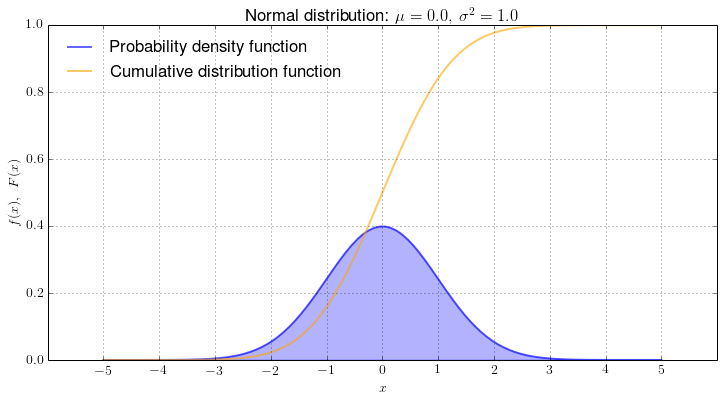

In [6]:
@interact(mu=(-2.0, 2.0), sigma2=(0.0, 2.0), x_max=(1, 10))
def plot_poisson(mu, sigma2, x_max):
    plot_continuous(stats.norm(mu, sigma2), x_max)
    plt.title("Normal distribution: $ \mu = %.1f,\: \sigma ^2 = %.1f$" % (mu, sigma2))
    
# 以下のように1行でも記述できるが、読みやすさを優先した
#interact(lambda mu, sigma2, x_max: plot_continuous(stats.norm(mu, sigma2), x_max), mu=(-2.0, 2.0), sigma2=(0.0, 2.0), x_max=(1, 10))